Loading and Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Project/success_prediction.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
X = df.drop(columns=["Item_Outlet_Sales"])
Y = df["Item_Outlet_Sales"]

SEED = 42

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = SEED)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [ ]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
Y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

Exploratory Data Analysis

In [ ]:
X_train_c = X_train.copy()

In [ ]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [ ]:
X_train_c.isnull().sum()


Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
num_data = X_train_c.select_dtypes(exclude=["object"])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def visuzalize_num_features(data_frame, col_name):
  fig, ax = plt.subplots(1, 2, figsize=(12,5))
  sns.histplot(data = X_train_c, x = col_name, ax = ax[0])
  sns.boxplot(data = X_train_c, y = col_name, ax = ax[1])

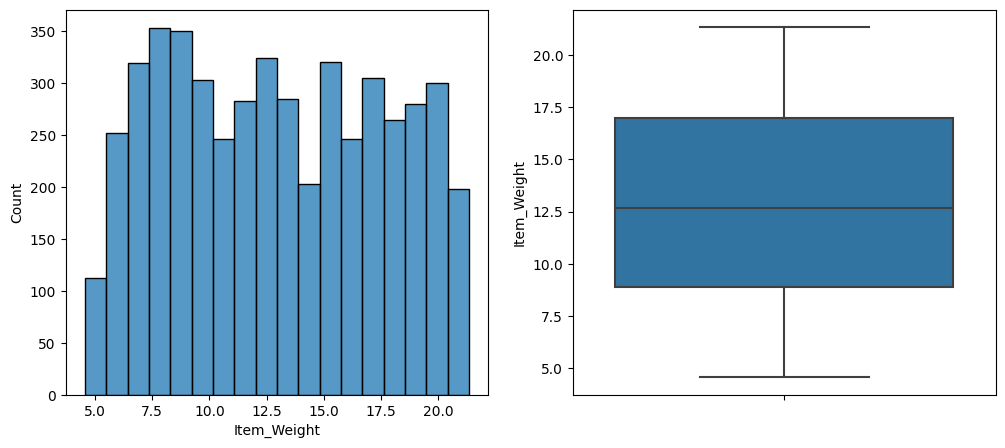

In [ ]:
visuzalize_num_features(X_train_c, "Item_Weight")

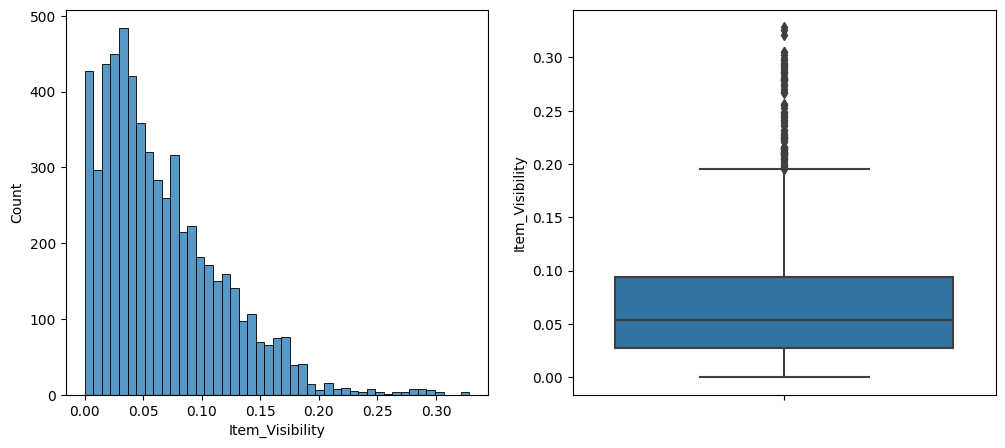

In [ ]:
visuzalize_num_features(X_train_c, "Item_Visibility")

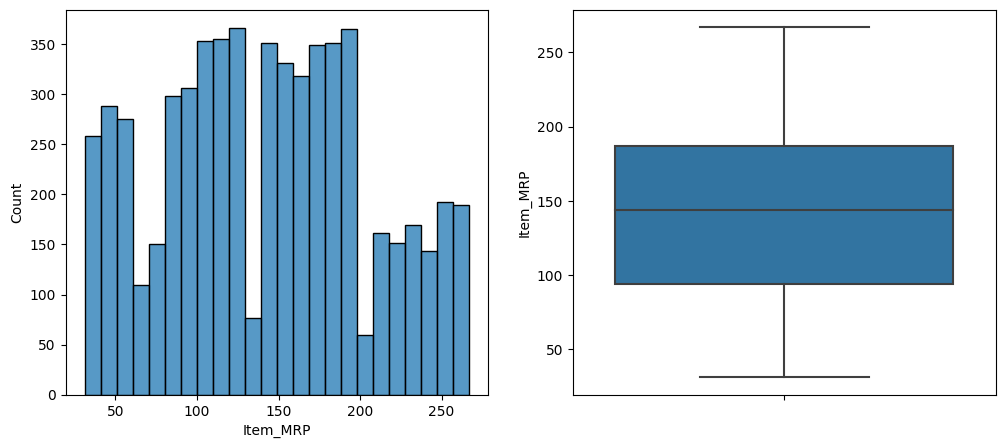

In [ ]:
visuzalize_num_features(X_train_c, "Item_MRP")

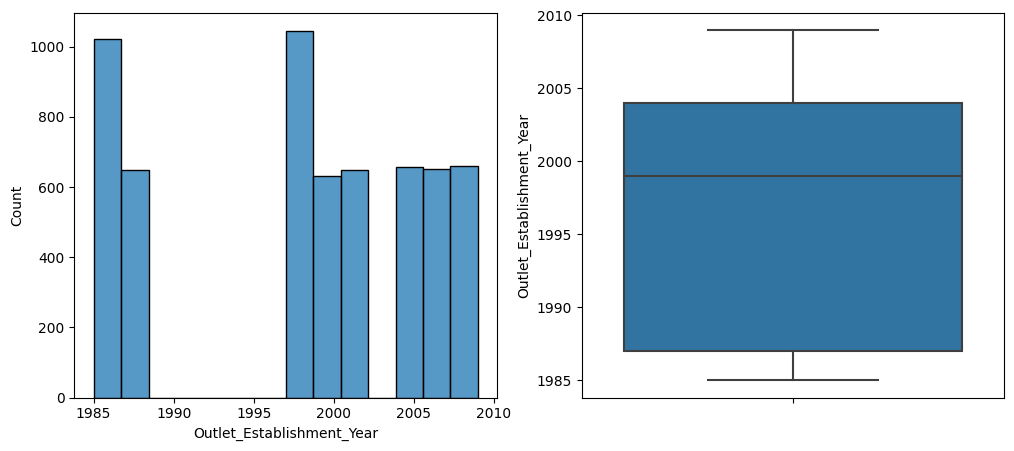

In [ ]:
visuzalize_num_features(X_train_c, "Outlet_Establishment_Year")

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

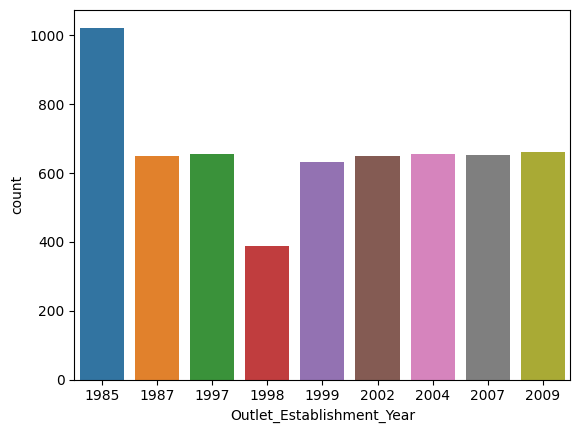

In [ ]:
sns.countplot(data = X_train_c, x = "Outlet_Establishment_Year")

In [ ]:
cat_features = X_train_c.select_dtypes(include=["object"])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [ ]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
cat_features['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [ ]:
cat_features['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [ ]:
cat_features['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [ ]:
cat_features['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [ ]:
cat_features['Outlet_Size'].value_counts()

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [ ]:
cat_features['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

In [ ]:
cat_features['Outlet_Type'].value_counts()

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

Data Wrangling and Feature Engineering

In [ ]:
# Creating High Level Item Types To Seperate Out Based on First Two Characters
X_train_c['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [ ]:
# Mapping Item ID to Item Type
def create_item_type(data_frame):
  data_frame["Item_Type"] = data_frame["Item_Identifier"].str[:2]
  data_frame["Item_Type"] = data_frame["Item_Type"].map({
      'FD' : 'Food',
      'NC' : 'Non_Consumables',
      'DR' : 'Drink'
  })

  return data_frame


In [ ]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
# Handling Missing Data For Item_Weight
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_train_c[["Item_Identifier", "Item_Weight"]].drop_duplicates().sort_values(by=["Item_Identifier"])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [ ]:
X_train_c[["Item_Type", "Item_Weight"]].drop_duplicates().sort_values(by=["Item_Type"])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [ ]:
# Filling Missing Values
# Use Mapping of Already Existing Values or Take Median Value For New Entries

ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values="Item_Weight", index="Item_Identifier").reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT["Item_Identifier"], ITEM_ID_WEIGHT_PIVOT["Item_Weight"]))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values="Item_Weight", index="Item_Type", aggfunc="median").reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT["Item_Type"], ITEM_TYPE_WEIGHT_PIVOT["Item_Weight"]))
list(ITEM_TYPE_WEIGHT_MAPPING.items())[:10]

[('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)]

In [ ]:
def handle_weight(data_frame):
  data_frame.loc[:,"Item_Weight"] = data_frame.loc[:,"Item_Weight"].fillna(data_frame.loc[:,"Item_Identifier"].map(ITEM_ID_WEIGHT_MAPPING))
  data_frame.loc[:,"Item_Weight"] = data_frame.loc[:,"Item_Weight"].fillna(data_frame.loc[:,"Item_Type"].map(ITEM_TYPE_WEIGHT_MAPPING))

  return data_frame

In [ ]:
X_train_c = handle_weight(X_train_c)

In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
# Handling Missing Data For Outlet_Size Using Mode
X_train_c.groupby(by=["Outlet_Type", "Outlet_Size"]).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [ ]:
import pandas as pd

def mode_func(x):
    if x.isna().all():
        return None  # Return None for all missing values
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result.iloc[0]
    else:
        return x.value_counts().idxmax()


OUTLET_TYPE_SIZE_PIVOT = X_train_c.groupby("Outlet_Type")["Outlet_Size"].agg(mode_func).reset_index()
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT["Outlet_Type"], OUTLET_TYPE_SIZE_PIVOT["Outlet_Size"]))
OUTLET_TYPE_SIZE_MAPPING

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [ ]:
def handle_outlet(data_frame):
  data_frame.loc[:,"Outlet_Size"] = data_frame.loc[:,"Outlet_Size"].fillna(data_frame.loc[:,"Outlet_Type"].map(OUTLET_TYPE_SIZE_MAPPING))
  return data_frame

In [ ]:
X_train_c = handle_outlet(X_train_c)

In [ ]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
# Standardizing Item_Fat_Content Categories

X_train_c["Item_Fat_Content"].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [ ]:
def standardize_itemfat(data_frame):
  data_frame["Item_Fat_Content"] = data_frame["Item_Fat_Content"].replace({
      "Low Fat" : "Low_Fat",
      "LF" : "Low_Fat",
      "reg" : "Regular",
      "low fat" : "Low_Fat"
  })
  return data_frame

In [ ]:
X_train_c = standardize_itemfat(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Correct Item Fat Content For Non Consumables
X_train_c.groupby(by=["Item_Type", "Item_Fat_Content"]).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Low_Fat             1137
dtype: int64

In [ ]:
X_train_c.loc[X_train_c["Item_Type"] == 'Non_Consumables', 'Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [ ]:
def correct_itemfat(data_frame):
  data_frame.loc[data_frame["Item_Type"] == "Non_Consumables", "Item_Fat_Content"] = "Non_Edible"
  return data_frame

In [ ]:
X_train_c = correct_itemfat(X_train_c)
X_train_c.groupby(by=["Item_Type", "Item_Fat_Content"]).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_Consumables  Non_Edible          1137
dtype: int64

In [ ]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


Dataset Preparing - Generalization

In [ ]:
def dataset(data_frame):
  data_frame = create_item_type(data_frame)

  data_frame = handle_weight(data_frame)

  data_frame = handle_outlet(data_frame)

  data_frame = standardize_itemfat(data_frame)

  data_frame = correct_itemfat(data_frame)

  return data_frame

In [ ]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_train = dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [ ]:
X_test = dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Handling Categorical Data

In [ ]:
cat_feats = X_train.select_dtypes(include=["object"])
cat_feats

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
5734,FDY08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
5191,FDC41,Low_Fat,Food,OUT017,Small,Tier 2,Supermarket Type1
5390,NCQ53,Non_Edible,Non_Consumables,OUT045,Small,Tier 2,Supermarket Type1
860,FDL46,Low_Fat,Food,OUT017,Small,Tier 2,Supermarket Type1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [ ]:
num_feats_train = X_train.select_dtypes(exclude=["object"]).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [ ]:
cat_feats_train = X_train.select_dtypes(include=["object"])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns = ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis = 1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
final_columns = X_train_final.columns.values
final_columns


array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [ ]:
num_feats_test = X_test.select_dtypes(exclude=["object"]).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=["object"])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns = ohe_feature_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis = 1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Model Creation

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_validate
import numpy as np

cv = 5
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=SEED)

cv_results = cross_validate(model, X_train_final, Y_train, cv=cv, scoring=("r2","neg_root_mean_squared_error"),)
print("Model :",model)
r2_scores = cv_results["test_r2"]
print("R2 CV Scores :",r2_scores)
print("R2 CV Scores Mean / Stddev :",np.mean(r2_scores), "/", np.std(r2_scores))

rmse_scores = cv_results["test_neg_root_mean_squared_error"]
rmse_scores = [-1 * score for score in rmse_scores]
print("RMSE CV Scores :",rmse_scores)
print("RMSE CV Scores Mean / Stddev :",np.mean(rmse_scores), "/", np.std(rmse_scores))


Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV Scores : [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 CV Scores Mean / Stddev : 0.5577825481764618 / 0.021778582707669483
RMSE CV Scores : [1095.416494682338, 1127.8526118741622, 1178.792371186943, 1115.290340217991, 1196.8930

In [ ]:
X_train_final.shape

(5966, 1573)

In [ ]:
X_test_final.shape

(2557, 1573)

In [ ]:
model.fit(X_train_final,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
Y_pred = model.predict(X_test_final)

In [ ]:
Y_pred

array([1232.6421 , 1030.248  ,  661.3564 , ...,  435.89905, 1891.5559 ,
       4640.8765 ], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
print("R2 Score :",r2_score(Y_test,Y_pred))
print("RMSE Score :",mean_squared_error(Y_test, Y_pred, squared=False))

R2 Score : 0.5701327508635561
RMSE Score : 1097.2945741485482


In [ ]:
Y_pred = pd.DataFrame(Y_pred)
Y_pred

,0
0,1232.642090
1,1030.248047
2,661.356384
3,5186.416504
4,1706.576538
...,...
2552,2080.760498
2553,3179.076416
2554,435.899048
2555,1891.555908


In [ ]:
Y_test = Y_test.reset_index(drop=True)
#Y_test.drop(["index"],axis=1)
Y_test

0       1743.0644
1        356.8688
2        377.5086
3       5778.4782
4       2356.9320
          ...    
2552    2133.2232
2553    4287.7520
2554     767.0016
2555     642.4970
2556    2570.6538
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

In [ ]:
result = pd.concat([Y_test, Y_pred], axis=1)
result.rename(columns = {'Item_Outlet_Sales':'Test Value', 0:"Predicted Value"}, inplace = True)

In [ ]:
result.head()

,Test Value,Predicted Value
0,1743.0644,1232.642090
1,356.8688,1030.248047
2,377.5086,661.356384
3,5778.4782,5186.416504
4,2356.9320,1706.576538


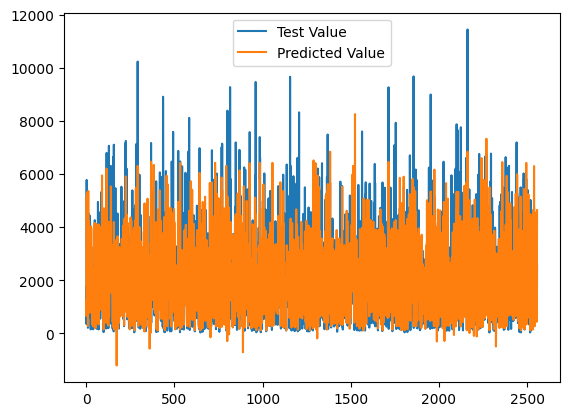

In [ ]:
plt.plot(result['Test Value'], label='Test Value')
plt.plot(result['Predicted Value'], label='Predicted Value')
plt.legend()
plt.show()